In [1]:
import sys
sys.path.insert(0,'../')

from sklearn.metrics import log_loss
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.utils import shuffle
import pandas as pd

pd.set_option("display.max_columns", 150)

In [2]:
all_data = pd.concat([pd.read_csv('../data/features.csv.zip',compression='zip'),\
                     pd.read_csv('../data/features_test.csv.zip',compression='zip')])

In [3]:
all_data.first_blood_team = all_data.first_blood_team.replace(0.0,-1.0)
all_data.first_blood_team = all_data.first_blood_team.fillna(0.0)

all_data.first_blood_player2 = all_data.first_blood_player2.fillna(0.0)
all_data.first_blood_player1 = all_data.first_blood_player1.fillna(0.0)
all_data.first_blood_player1 = all_data.first_blood_player1.astype(int)
all_data.first_blood_player2 = all_data.first_blood_player2.astype(int)
all_data = all_data.fillna(0.0)

In [4]:
all_data.head()

,barracks_status_dire,barracks_status_radiant,d1_deaths,d1_gold,d1_hero,d1_items,d1_kills,d1_level,d1_lh,d1_xp,d2_deaths,d2_gold,d2_hero,d2_items,d2_kills,d2_level,d2_lh,d2_xp,d3_deaths,d3_gold,d3_hero,d3_items,d3_kills,d3_level,d3_lh,d3_xp,d4_deaths,d4_gold,d4_hero,d4_items,d4_kills,d4_level,d4_lh,d4_xp,d5_deaths,d5_gold,d5_hero,d5_items,d5_kills,d5_level,d5_lh,d5_xp,dire_boots_count,dire_bottle_time,dire_courier_time,dire_first_ward_time,dire_flying_courier_time,dire_tpscroll_count,dire_ward_observer_count,dire_ward_sentry_count,duration,first_blood_player1,first_blood_player2,first_blood_team,first_blood_time,lobby_type,match_id,r1_deaths,r1_gold,r1_hero,r1_items,r1_kills,r1_level,r1_lh,r1_xp,r2_deaths,r2_gold,r2_hero,r2_items,r2_kills,r2_level,r2_lh,r2_xp,r3_deaths,r3_gold,r3_hero,r3_items,r3_kills,r3_level,r3_lh,r3_xp,r4_deaths,r4_gold,r4_hero,r4_items,r4_kills,r4_level,r4_lh,r4_xp,r5_deaths,r5_gold,r5_hero,r5_items,r5_kills,r5_level,r5_lh,r5_xp,radiant_boots_count,radiant_bottle_time,radiant_courier_time,radiant_first_ward_time,radiant_flying_courier_time,radiant_tpscroll_count,radiant_ward_observer_count,radiant_ward_sentry_count,radiant_win,start_time,tower_status_dire,tower_status_radiant
0,0.0,51.0,0,996,4,6,0,3,12,1058,0,986,42,4,0,4,12,1085,0,1536,21,6,0,5,23,2052,0,500,37,8,0,3,2,742,0,1003,84,9,1,3,3,958,4,103.0,-84.0,-52.0,221.0,3,2,2,2874.0,9,0,1.0,7.0,7,0,0,1489,11,7,0,5,20,2098,0,991,67,4,0,3,10,842,0,1143,29,8,0,5,10,1909,0,741,20,7,0,3,6,757,1,658,105,11,0,3,4,732,2,134.0,-80.0,35.0,244.0,2,2,0,1.0,1430198770,0.0,1796.0
1,1.0,63.0,0,1384,39,8,0,5,16,1960,1,566,88,5,0,3,1,640,0,1350,79,12,2,3,2,720,0,583,7,7,0,2,0,440,0,1622,12,9,0,4,24,1470,4,149.0,-84.0,-5.0,195.0,5,3,1,2463.0,7,0,1.0,54.0,0,1,1,1033,42,12,0,4,9,1188,1,993,49,7,0,4,10,1596,0,1502,67,7,1,4,18,1506,0,631,37,7,0,3,7,669,0,539,26,5,0,2,1,415,0,173.0,-80.0,-20.0,0.0,2,2,0,1.0,1430220345,0.0,1974.0
2,63.0,0.0,1,2028,22,10,1,5,19,2305,1,959,66,10,0,3,19,1024,0,620,86,8,0,3,3,755,0,667,29,7,0,4,4,1319,0,1512,80,7,0,3,25,1350,4,45.0,-77.0,13.0,221.0,3,3,1,2130.0,3,0,-1.0,224.0,7,2,0,1270,33,12,0,4,22,1319,0,775,98,6,0,3,6,1314,0,909,20,6,1,3,0,1297,1,2096,27,6,1,5,26,2360,0,1627,4,9,0,3,27,1395,5,63.0,-82.0,-39.0,0.0,2,2,1,0.0,1430227081,1830.0,0.0
3,63.0,50.0,0,1174,96,6,0,5,17,1878,0,1468,48,10,0,3,22,732,0,1051,15,7,0,4,11,1681,0,537,102,7,0,2,1,674,0,499,20,7,0,2,0,510,4,124.0,-80.0,27.0,184.0,0,2,0,1459.0,0,0,0.0,0.0,1,3,0,1056,29,5,0,4,14,1779,0,539,30,6,0,2,1,539,0,1139,75,6,0,5,15,2037,0,499,37,6,0,2,0,591,0,1075,41,6,0,3,12,712,3,208.0,-75.0,-30.0,0.0,0,2,0,0.0,1430263531,2047.0,1920.0
4,63.0,3.0,2,586,26,9,0,3,1,704,0,1665,69,7,1,3,20,1169,0,638,22,9,0,3,1,1055,0,1275,25,8,0,5,18,1815,1,904,8,7,0,4,6,1119,3,182.0,-80.0,-16.0,225.0,6,3,0,2449.0,6,0,1.0,-21.0,7,4,0,1090,13,8,1,4,8,1431,1,552,27,7,0,2,0,629,0,927,30,8,1,3,0,884,0,1439,72,11,1,3,16,925,0,880,93,8,0,4,7,1482,4,166.0,-81.0,46.0,181.0,1,2,0,0.0,1430282290,1974.0,4.0


In [5]:
dont_use_cols = ['radiant_win', 'match_id','duration']+\
                ['start_time','tower_status_dire','tower_status_radiant','barracks_status_radiant','barracks_status_dire']

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)

In [8]:
len(all_data)

114407

In [14]:
y = all_data['radiant_win'].as_matrix()
X = all_data[all_data.columns.difference(dont_use_cols)].as_matrix()

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

explained variance ratio (first two components): [ 0.10520233  0.10160853]


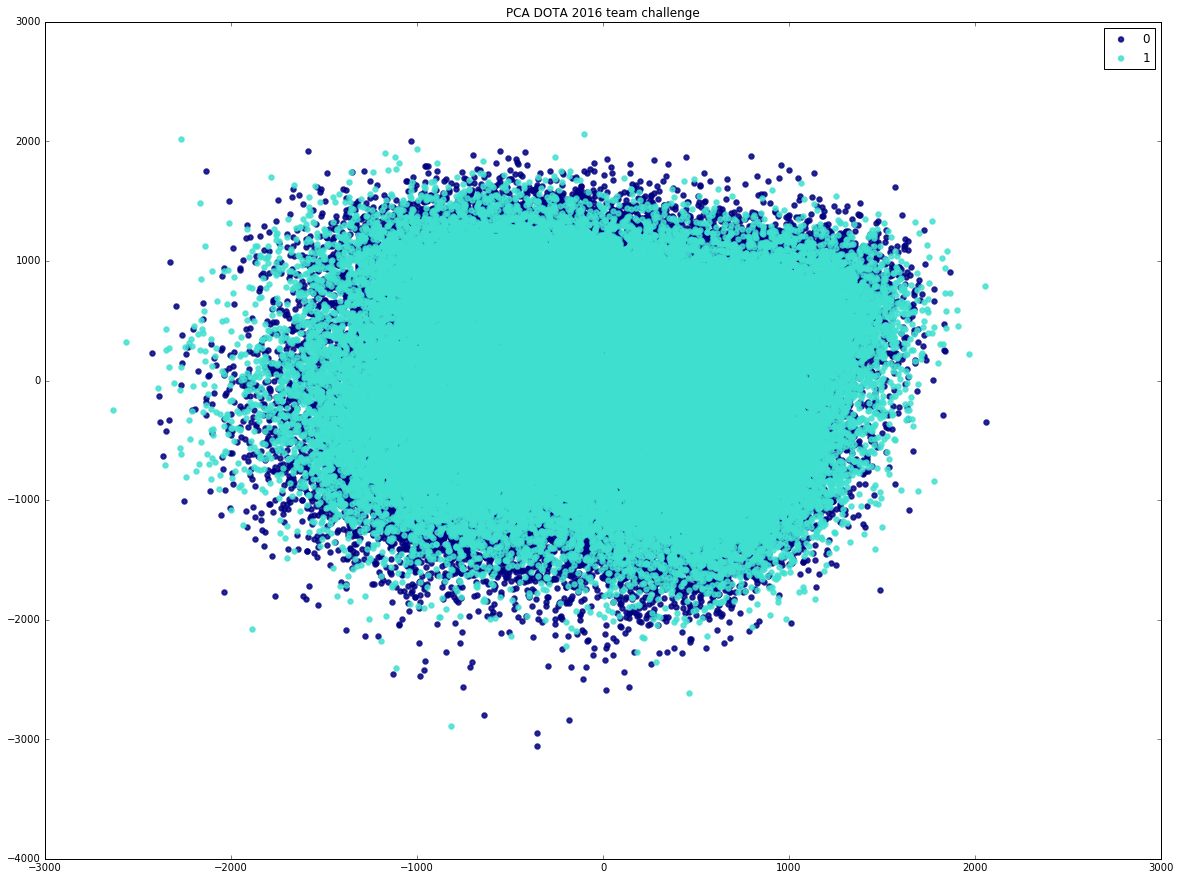

In [20]:
from sklearn.decomposition import PCA


target_names = ['0','1']
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,15))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA DOTA 2016 team challenge')

plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

plt.show()

In [22]:
y = all_data[all_data.lobby_type==0]['radiant_win'].as_matrix()
X = all_data[all_data.lobby_type==0][all_data.columns.difference(dont_use_cols)].as_matrix()

explained variance ratio (first two components): [ 0.10118627  0.09863229]


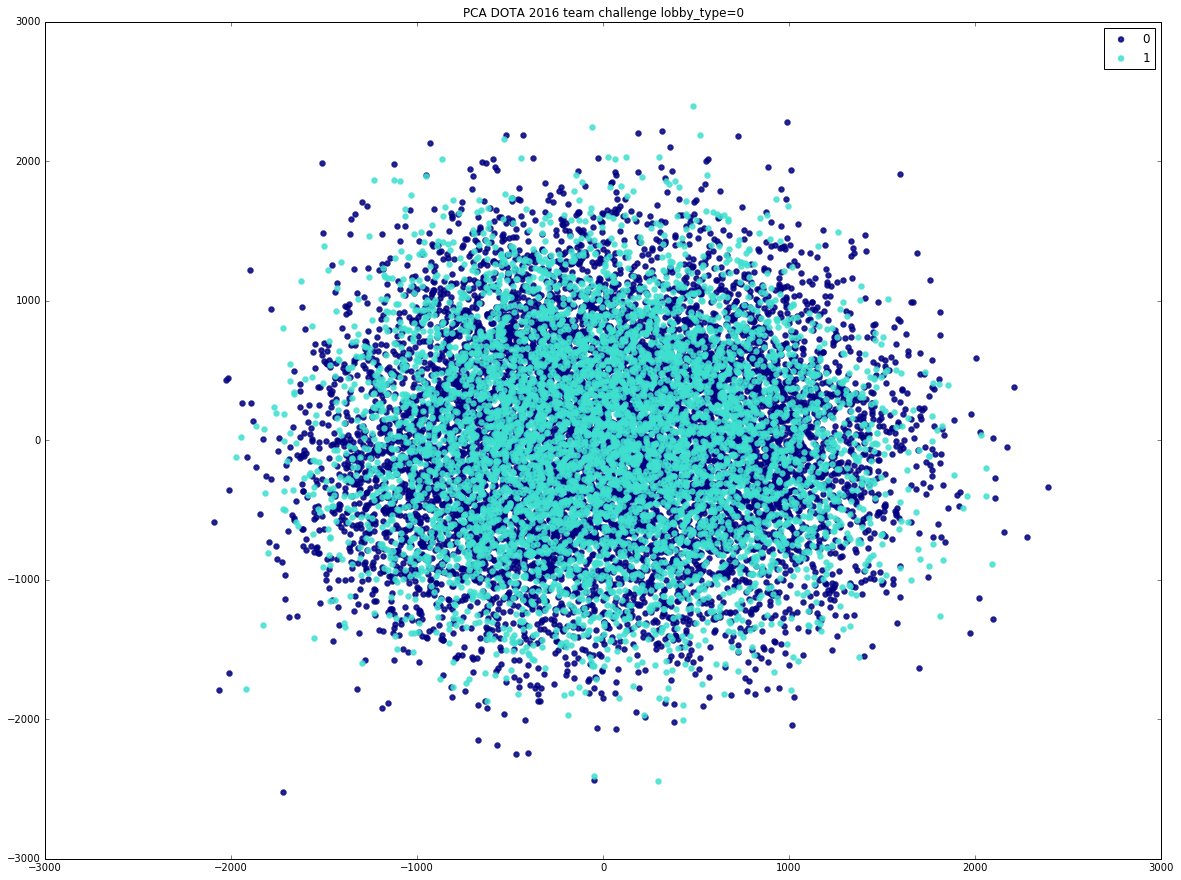

In [23]:
from sklearn.decomposition import PCA


target_names = ['0','1']
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,15))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA DOTA 2016 team challenge lobby_type=0')

plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

plt.show()

In [24]:
y = all_data[all_data.lobby_type==1]['radiant_win'].as_matrix()
X = all_data[all_data.lobby_type==1][all_data.columns.difference(dont_use_cols)].as_matrix()

explained variance ratio (first two components): [ 0.10816906  0.1034524 ]


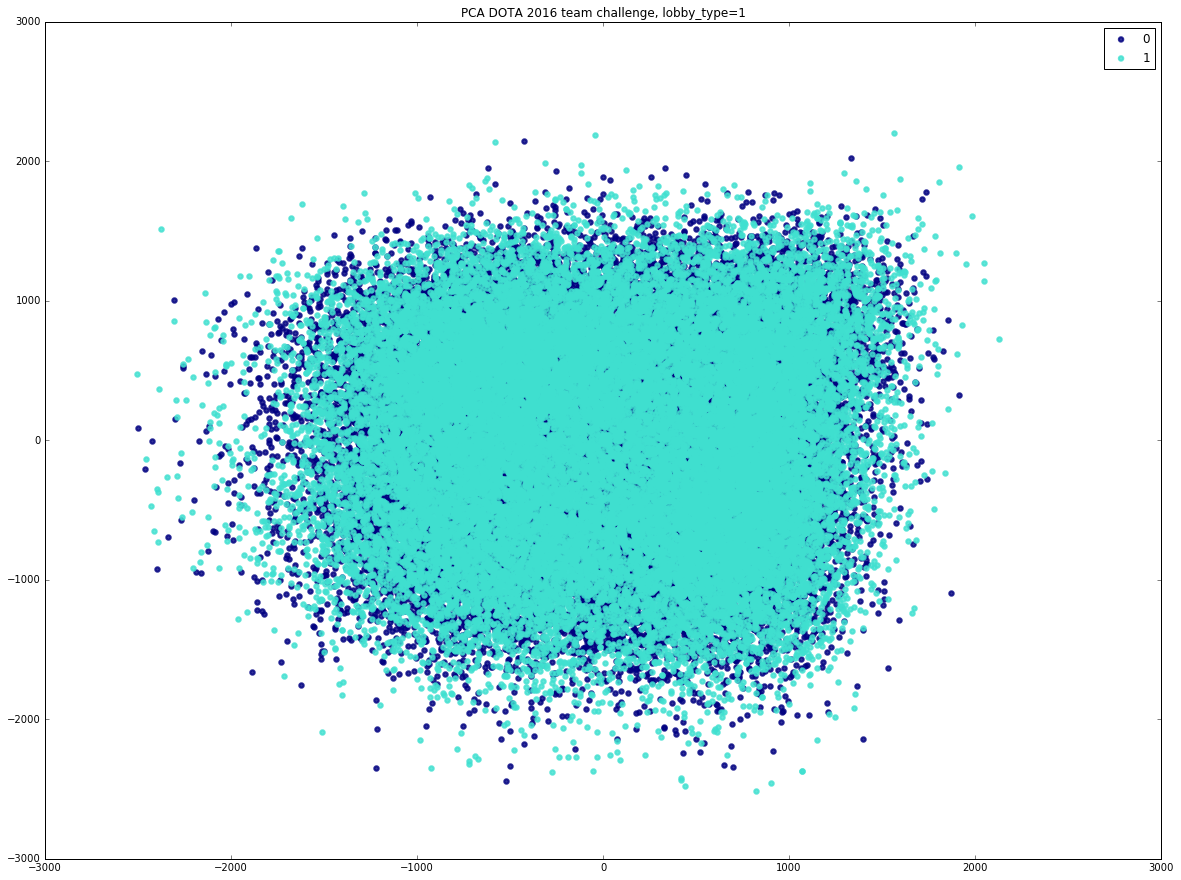

In [26]:
from sklearn.decomposition import PCA


target_names = ['0','1']
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,15))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA DOTA 2016 team challenge, lobby_type=1')

plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

plt.show()

In [27]:
y = all_data[all_data.lobby_type==7]['radiant_win'].as_matrix()
X = all_data[all_data.lobby_type==7][all_data.columns.difference(dont_use_cols)].as_matrix()

explained variance ratio (first two components): [ 0.10432316  0.10150517]


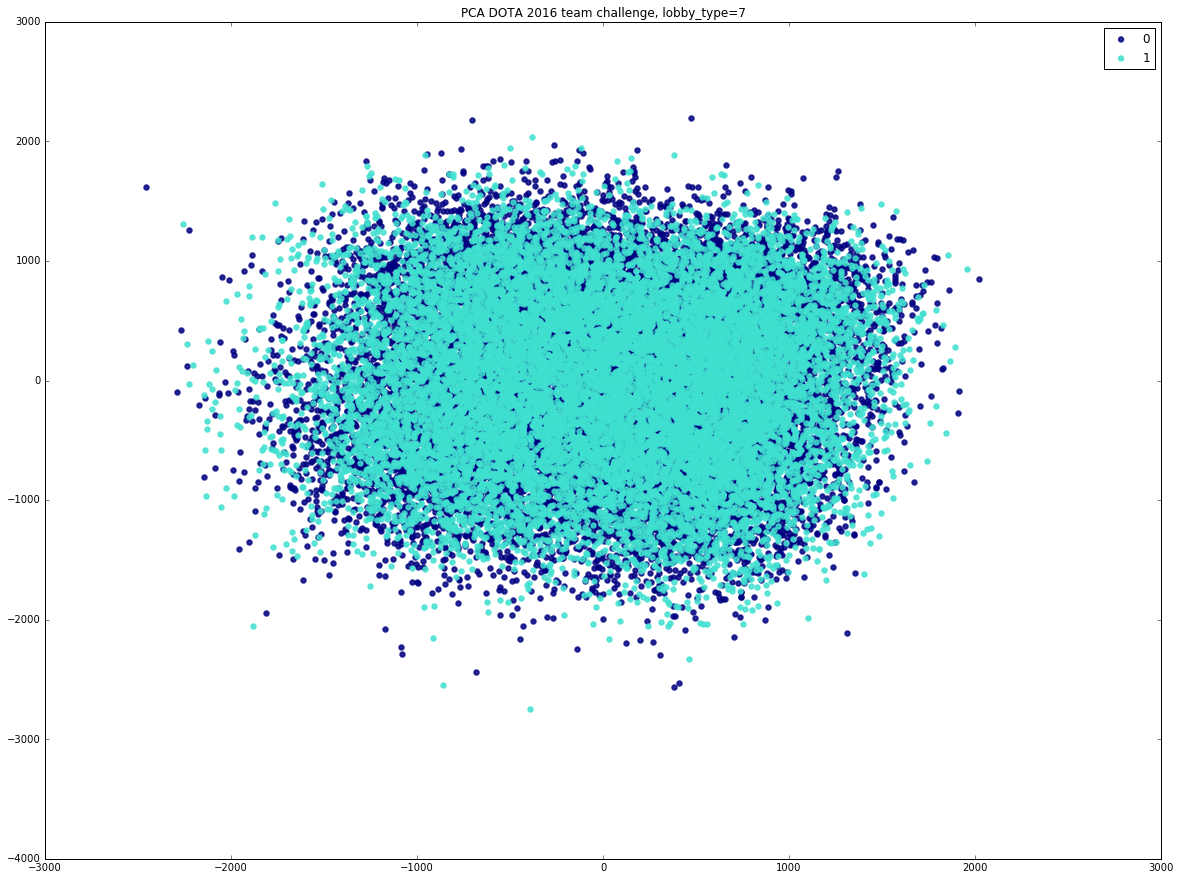

In [28]:
from sklearn.decomposition import PCA


target_names = ['0','1']
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure(figsize=(20,15))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA DOTA 2016 team challenge, lobby_type=7')

plt.figure()
# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('LDA of IRIS dataset')

plt.show()